# Задание 1

## пункт 1, 2 (Импорт данных)

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('bill_authentication.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Метка класса

In [6]:
df['Class'].unique()

array([0, 1], dtype=int64)

## пункт 3 (Стандартизация)

In [63]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[['Variance', 'Skewness', 
                                    'Curtosis', 'Entropy']])
df[['Variance', 'Skewness', 
                        'Curtosis', 'Entropy']] = x
df

,Variance,Skewness,Curtosis,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


## пункт 4 (Получение обучающей выборки)

#### Выделение обучающей и тестовой выборки

In [14]:
from sklearn.model_selection import train_test_split
train_table, test_table = train_test_split(df, train_size = 4/6)

test_table = test_table.reset_index()
print(train_table, test_table)

      Variance  Skewness  Curtosis   Entropy  Class
62    1.345965  1.597749 -1.274685 -1.501749      0
1170 -0.275408  0.216562 -1.114790 -0.948242      1
1181 -1.415772 -1.447842  2.118501  0.489393      1
439   1.511322  0.031387 -0.390088  1.311349      0
1140 -0.339391 -0.344239 -0.374973  1.063806      1
...        ...       ...       ...       ...    ...
1281 -1.134710 -1.301478  1.057309  0.786153      1
326  -0.209315 -1.429161  1.615351 -0.157097      0
513   1.936733  0.723387 -0.925650  0.393347      0
1273 -0.985751 -0.402083  0.068324  0.362565      1
176  -0.085485  1.228475 -1.188970 -2.204856      0

[914 rows x 5 columns]      index  Variance  Skewness  Curtosis   Entropy  Class
0      357  0.975240  1.153341 -0.998252  0.195099      0
1      659  0.617359  0.138616 -0.016207  0.480161      0
2      342  1.266542 -0.288159 -0.117631  1.130322      0
3      791 -1.728398  0.928674 -0.396849 -2.658612      1
4      402  0.538745  0.854956 -0.190418  0.883432      0
..  

## пункт 5 (Дерево классификации)

### Построение дерева и визуализация
#### Метод 1

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

def MakingTree(crit, alpha):
    clf = tree.DecisionTreeClassifier(criterion = crit, ccp_alpha = alpha)
    clf.fit(train_table[['Variance', 'Skewness', 'Curtosis', 'Entropy']], train_table[['Class']])

    tree.plot_tree(clf,filled = True, rounded = True)
    plt.show

#### Классифицируем тестовую выборку и находим процент совпадения

In [52]:
res = clf.predict(test_table[['Variance', 'Skewness', 'Curtosis', 'Entropy']])
test_table2 = test_table.copy()
test_table2['new_class'] = pd.Series(res)
good = test_table2[test_table2['new_class'] == test_table2['Class']]
good_size = good['Variance'].count()
all_size = test_table2['Variance'].count()
print(good_size/all_size * 100)
print(clf.score(test_table[['Variance', 'Skewness', 'Curtosis', 'Entropy']], test_table[['Class']]))

98.0349344978166
0.980349344978166


#### Неопределенность Джини

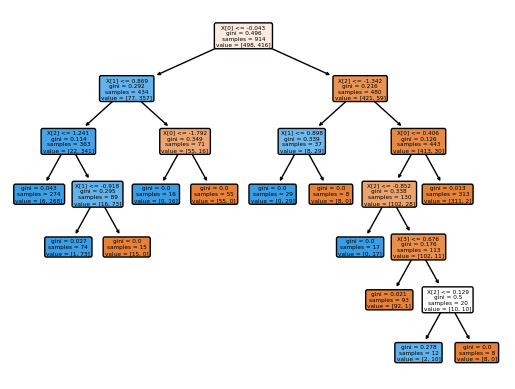

In [53]:
MakingTree('gini', 0.005)

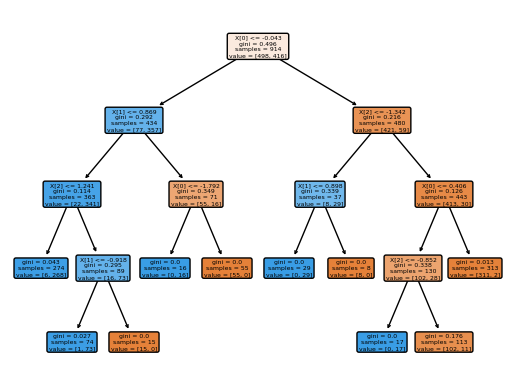

In [54]:
MakingTree('gini', 0.01)

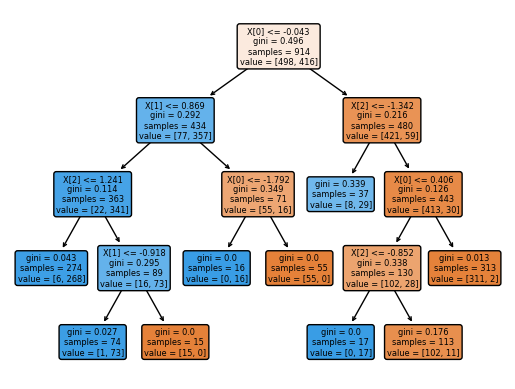

In [55]:
MakingTree('gini', 0.015)

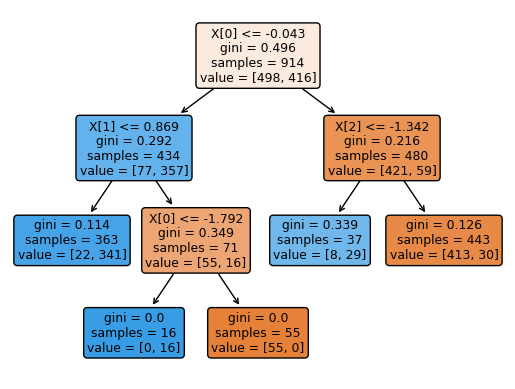

In [56]:
MakingTree('gini', 0.02)

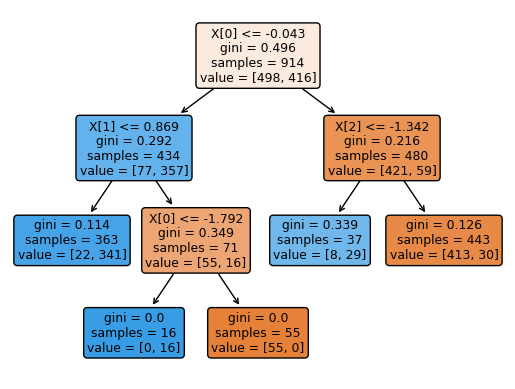

In [57]:
MakingTree('gini', 0.025)

98.0349344978166
0.980349344978166


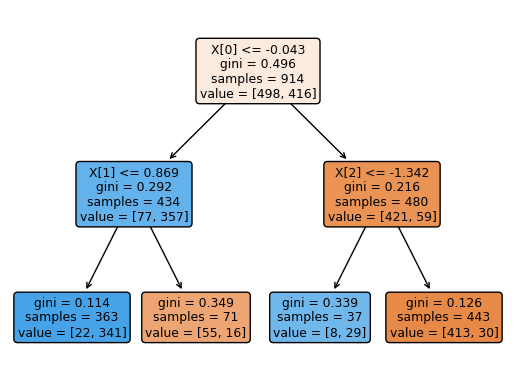

In [34]:
MakingTree('gini', 0.03)

### Данное дерево ('gini', 0.03) является оптимальным, т.к. оно не переобучается

98.0349344978166
0.980349344978166


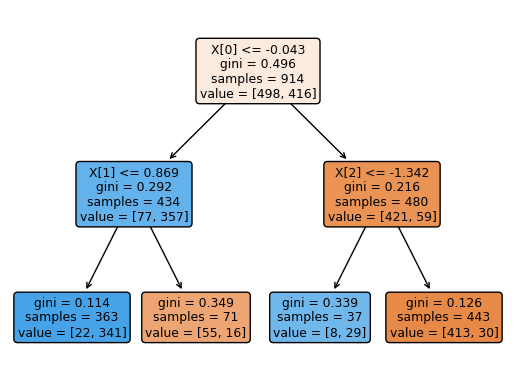

In [35]:
MakingTree('gini', 0.035)

98.0349344978166
0.980349344978166


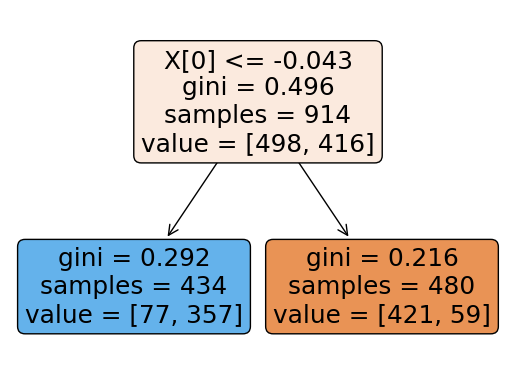

In [36]:
MakingTree('gini', 0.2)

98.0349344978166
0.980349344978166


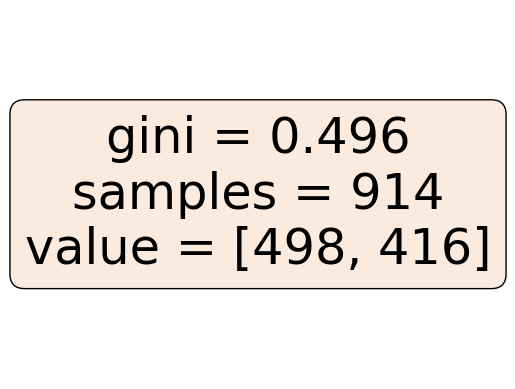

In [37]:
MakingTree('gini', 0.8)

#### Энтропия Шенона

98.0349344978166
0.980349344978166


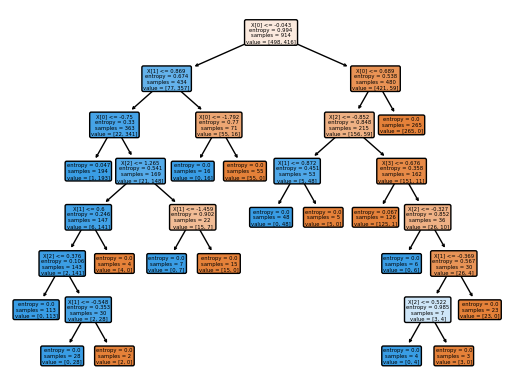

In [39]:
MakingTree('entropy', 0.005)

98.0349344978166
0.980349344978166


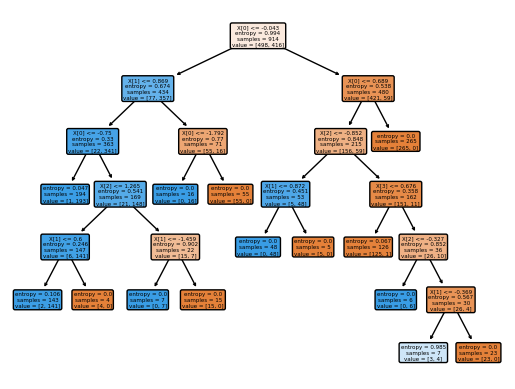

In [40]:
MakingTree('entropy', 0.01)

98.0349344978166
0.980349344978166


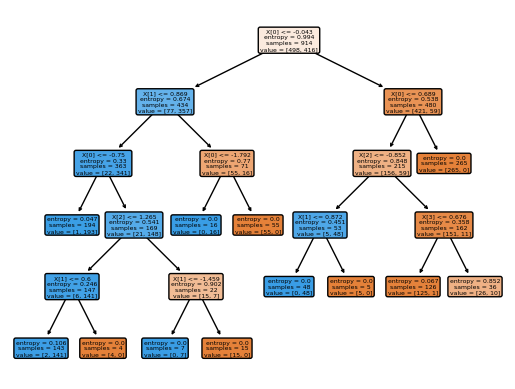

In [41]:
MakingTree('entropy', 0.015)

98.0349344978166
0.980349344978166


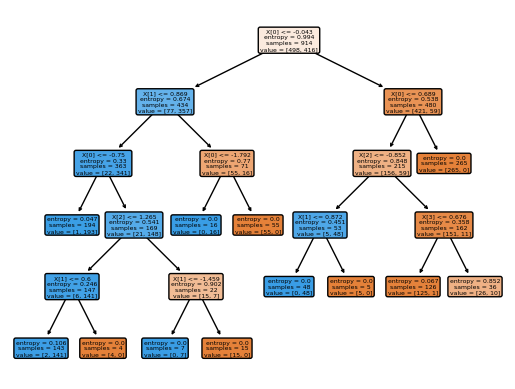

In [42]:
MakingTree('entropy', 0.02)

98.0349344978166
0.980349344978166


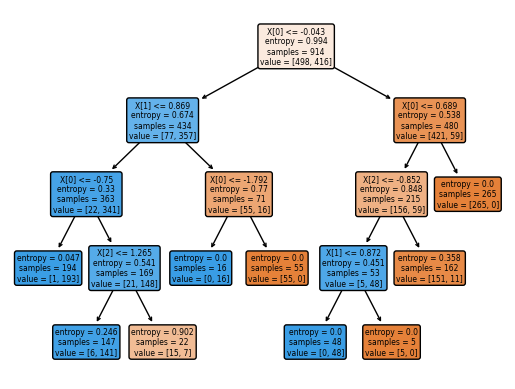

In [43]:
MakingTree('entropy', 0.025)

98.0349344978166
0.980349344978166


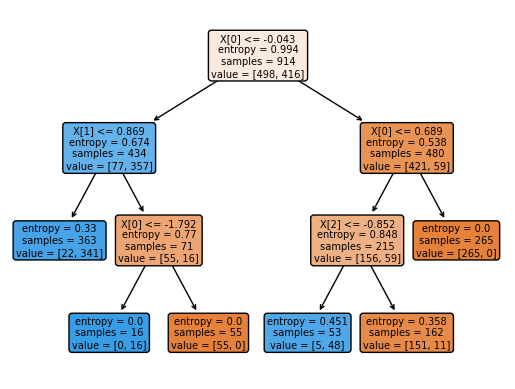

In [44]:
MakingTree('entropy', 0.03)

98.0349344978166
0.980349344978166


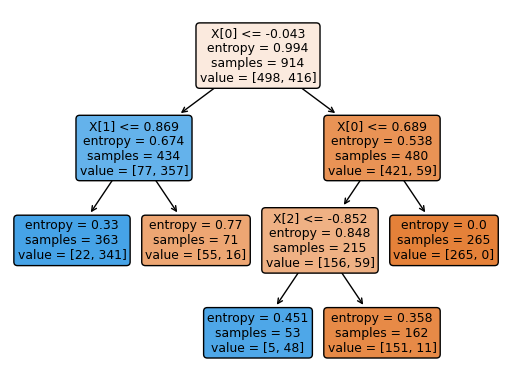

In [51]:
MakingTree('entropy', 0.06)

### Данное дерево ('entropy', 0.06) является оптимальным, т.к. оно не переобучается

98.0349344978166
0.980349344978166


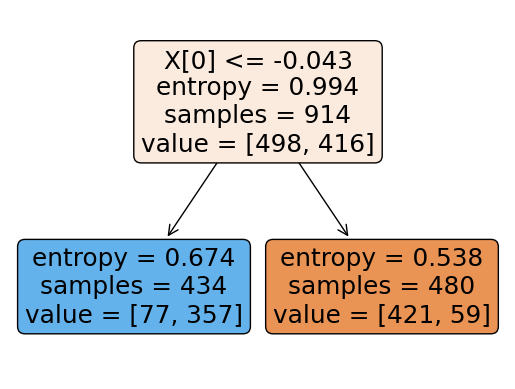

In [46]:
MakingTree('entropy', 0.2)

98.0349344978166
0.980349344978166


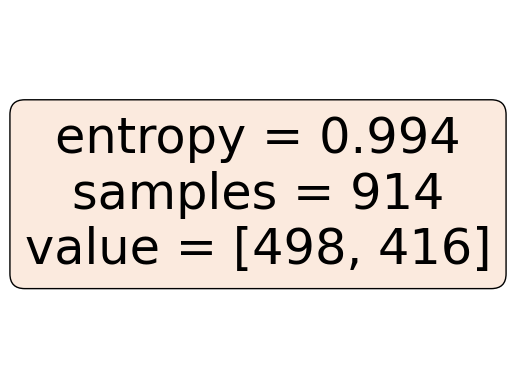

In [47]:
MakingTree('entropy', 0.8)

#### Метод 2 - не работает

In [21]:
#import os
#os.environ["PATH"] += os.pathsep + 'что-то нужно установить?'

import graphviz

dot_data = tree.export_graphviz(clf, out_file = None, filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("bill")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Задание 2

## пункт 1, 2 (Импорт данных)

In [58]:
import pandas as pd

In [59]:
df1 = pd.read_csv('winequality-white.csv')
df1

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Метка класса

In [60]:
df1['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

## пункт 3 (Стандартизация)

In [62]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df1[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])

df1[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']] = x
df1

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,6
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,5
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,6
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,7


## пункт 4 (Получение обучающей выборки)

In [64]:
from sklearn.model_selection import train_test_split
train_table, test_table = train_test_split(df1, train_size = 4/6)

test_table = test_table.reset_index()
print(train_table, test_table)

      FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  Chlorides  \
4192     -0.183445        -0.776323   -0.778394       0.021411  -0.081131   
1195      1.238723        -0.577879    0.957036       1.539687  -0.355784   
2574     -0.064931        -0.180992   -0.778394      -0.885612  -0.126906   
900      -0.301959        -0.776323    0.378559       0.297461   0.285074   
3891      0.290611        -0.776323    0.295920      -0.964483   0.147747   
...            ...              ...         ...            ...        ...   
3288     -0.301959        -0.776323   -1.604790      -0.392665   6.327442   
3728     -0.776015        -0.776323   -0.034638      -0.195486  -0.813539   
1509      1.238723        -0.776323    1.287594      -0.944765   0.330849   
2888      1.949807        -0.577879    0.048001      -1.122226  -0.264233   
1036      0.764667        -1.073988    0.295920      -0.964483   0.651278   

      FreeSulfurDioxide  TotalSulfurDioxide   Density        PH  Sulphates 

## пункт 5 (МГК)

## пункт 6, 7 (Построение дерева решений. Выводы)